<a href="https://colab.research.google.com/github/John260260/Regression_problem/blob/main/Copy_of_Real_estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Real estate.csv',index_col=0)

In [ ]:
#del index name
df.index.name = None

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 7)

## Exploratory Data Analysis

In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [ ]:
#renaming columns
df.rename(columns={'X1 transaction date':'transaction date','X2 house age':'house age','X3 distance to the nearest MRT station':'distance to the nearest MRT station', 'X4 number of convenience stores':'number of convenience stores', 'X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'house price of unit area'},inplace=True)

In [ ]:
df.head(5)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
new=df['transaction date'].astype(str).str.split('.',n=1,expand=True)

In [ ]:
df['transaction date']=new[0]

In [ ]:
df['transaction date']

1      2012
2      2012
3      2013
4      2013
5      2012
       ... 
410    2013
411    2012
412    2013
413    2013
414    2013
Name: transaction date, Length: 414, dtype: object

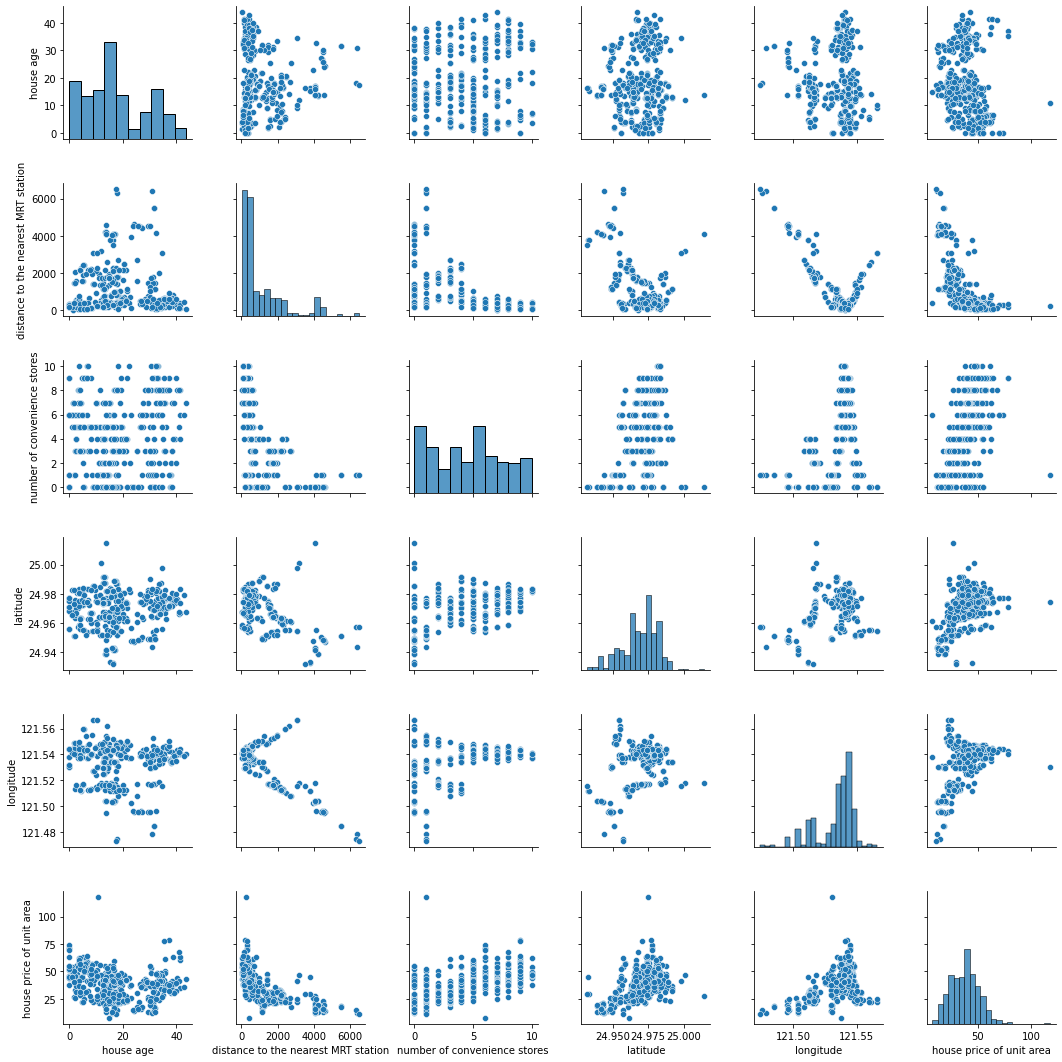

In [ ]:
sns.pairplot(data=df)

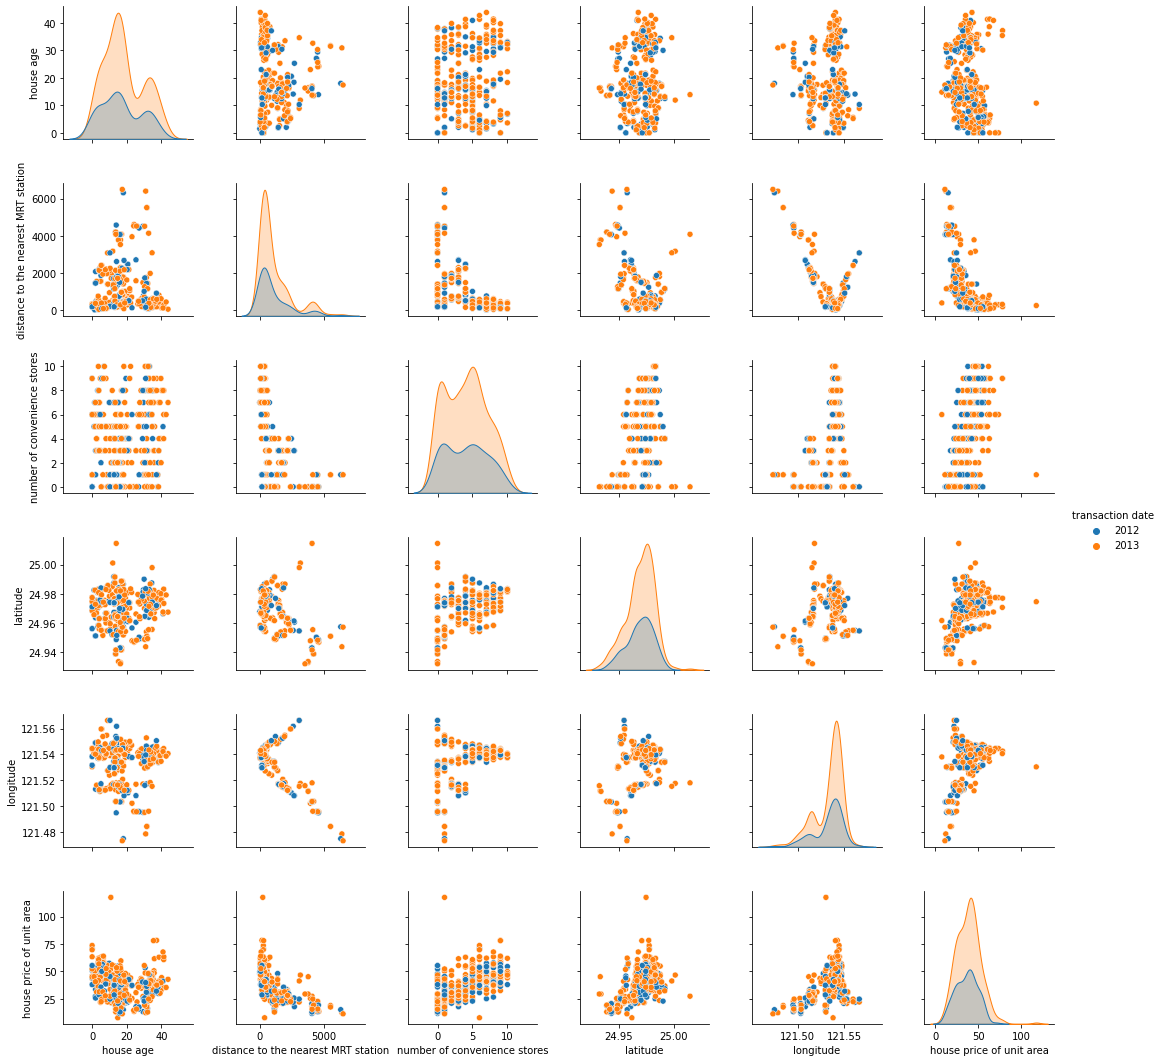

In [ ]:
sns.pairplot(df,hue='transaction date')

1. We can see change in the mean price of unit area in 2012 & 2013. This is a small difference as mean is slightly moved towards right. but the no. of flats sold are significantly less in 2012
2. Distance to nearest MRT station is directly proportional to price
3. As the no. of convenient stores are increasing the base price of the unit area is also seen increasing
4. House age is indirectly proportional to price,but there are many data which are not affected by the house age those could be outliers but there could be some other reasons too

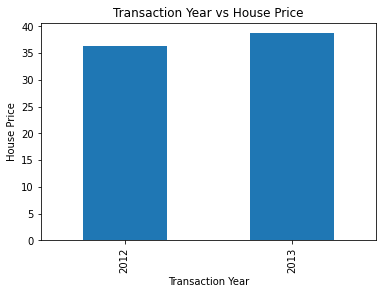

In [ ]:
data=df.copy()
data.groupby('transaction date')['house price of unit area'].mean().plot.bar()
plt.title('Transaction Year vs House Price')
plt.xlabel('Transaction Year')
plt.ylabel('House Price')
plt.show()

#the mean unit price of house area has increased in 2013. did it affect the sale in 2013. lets see the houses being sold in 2013

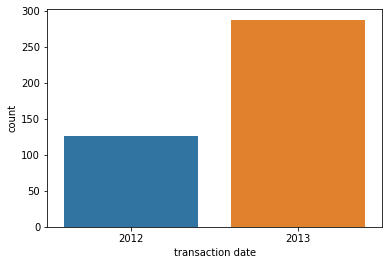

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='transaction date',data=df)
plt.show()

#count of houses sold in 2013 has rather been more comparitvely though the mean price have increased for unit area

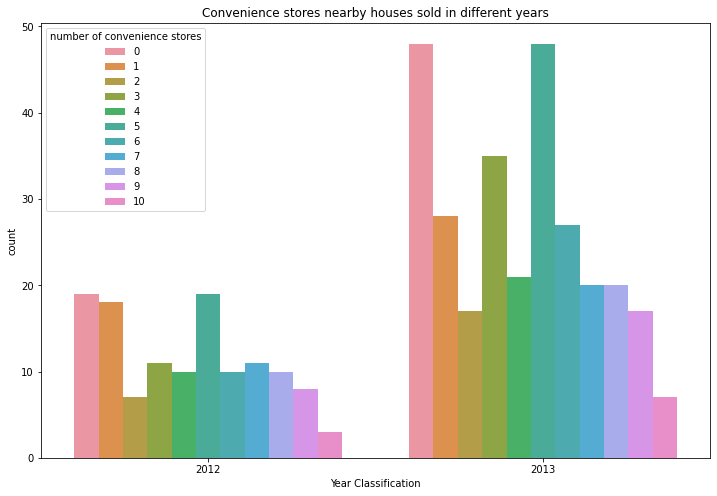

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='transaction date',hue='number of convenience stores',data=df)
plt.title('Convenience stores nearby houses sold in different years')
plt.xlabel('Year Classification')
plt.show()

#we can see the ratio of stores to room sold in 2013 has increased.

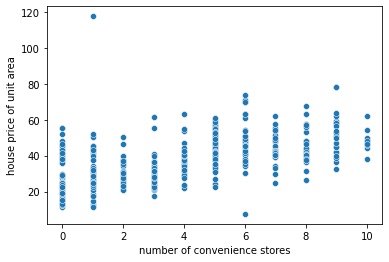

In [ ]:
sns.scatterplot(x='number of convenience stores',y='house price of unit area',data=df)

We can see the base price of unit area has been increasing with increase in no. of stores

In [ ]:
numeric_feature= list(df.select_dtypes(include=['int64','float64']).keys())
numeric_feature

['house age',
 'distance to the nearest MRT station',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area']

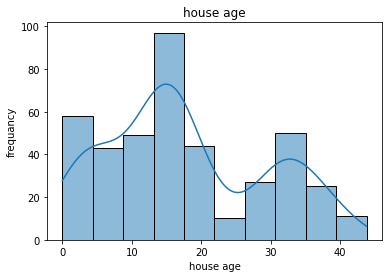

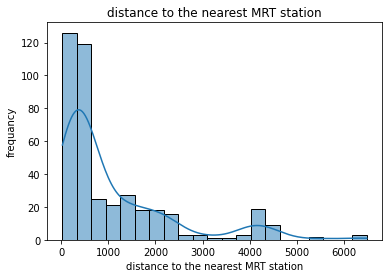

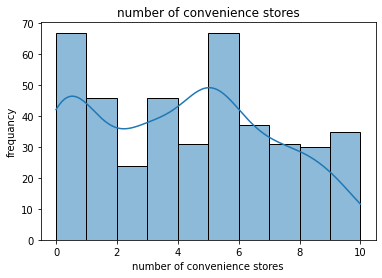

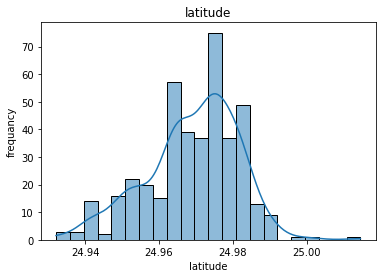

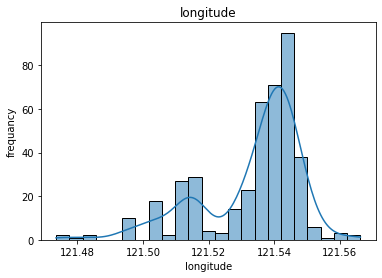

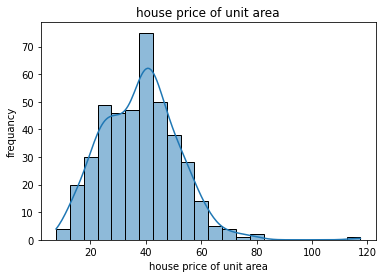

In [ ]:
for feature in numeric_feature:
    sns.histplot(data=df,x=feature,kde=True,palette='pastel')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('frequancy')
    plt.show()

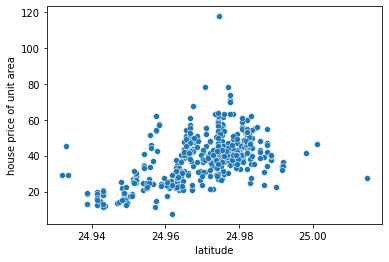

In [ ]:
sns.scatterplot(x='latitude',y='house price of unit area',data=df)

We can see houses falling under latitude of 24.97-24.98 has greater house price unit

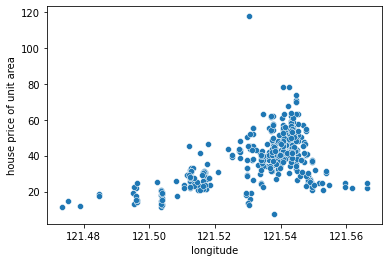

In [ ]:
sns.scatterplot(x='longitude',y='house price of unit area',data=df)

We can see houses falling under longitude of 121.53-121.54 has greater house price unit

## Feature Engineering

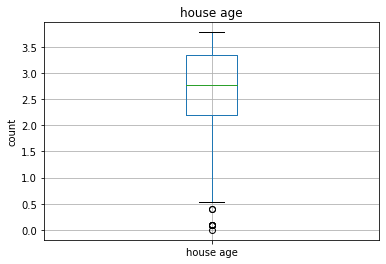

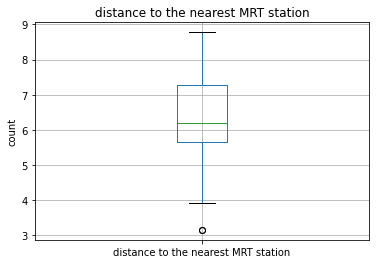

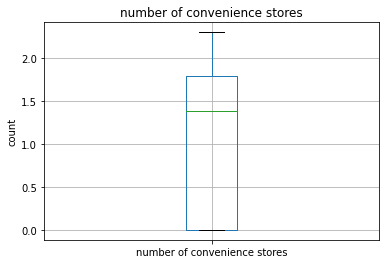

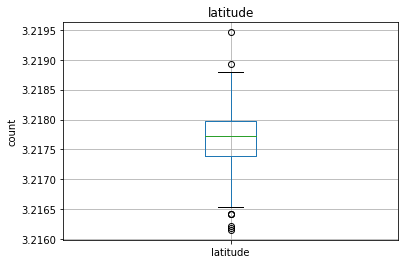

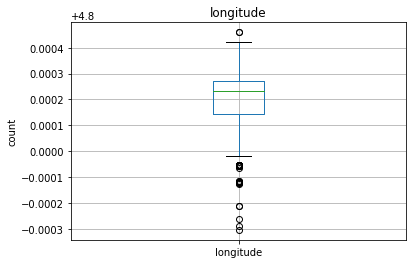

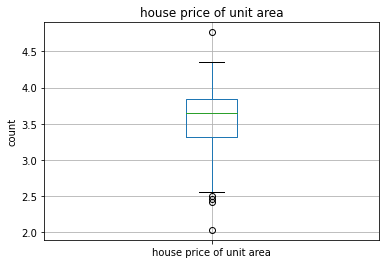

In [ ]:
#checking the outliers
for feature in numeric_feature:
  data=df.copy()
  if data[feature].unique() is 0:
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(feature)
    plt.title(feature)
    plt.ylabel('count')
    plt.show()


There are no outliers for conveinience store column and we can see the longitude column is skewed

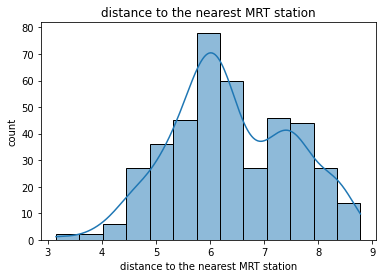

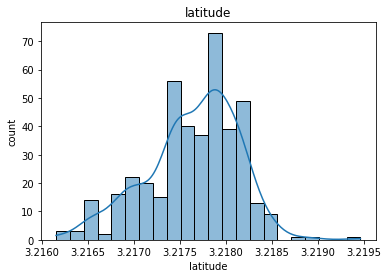

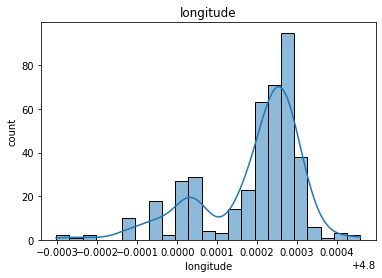

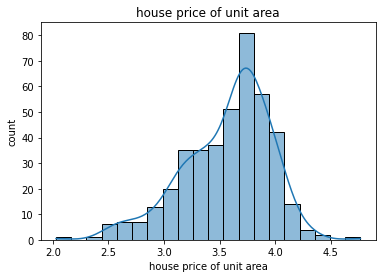

In [ ]:
for feature in numeric_feature:
  if 0 in df[feature].unique():
    pass
  else:
    df[feature]=np.log(df[feature])
    sns.histplot(data=df,x=feature, kde=True,palette='pastel')
    plt.title(feature)
    plt.ylabel('count')
    plt.show()

In [ ]:
df.head(5)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
1,2012,32.0,4.441225,10,3.218195,4.800245,3.634951
2,2012,19.5,5.725527,9,3.218089,4.800239,3.742420
3,2013,13.3,6.331474,5,3.218374,4.800276,3.856510
4,2013,13.3,6.331474,5,3.218374,4.800276,4.003690
5,2012,5.0,5.967603,5,3.218050,4.800264,3.763523


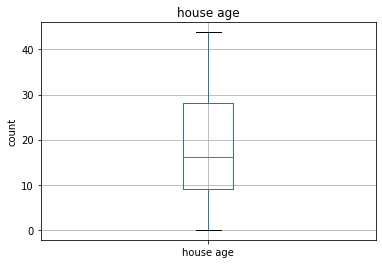

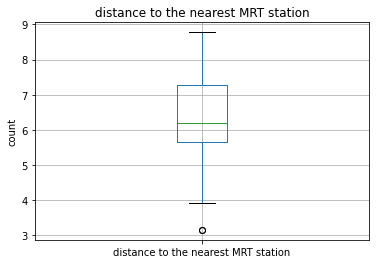

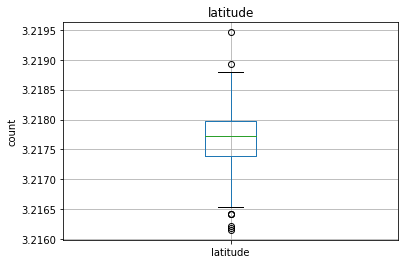

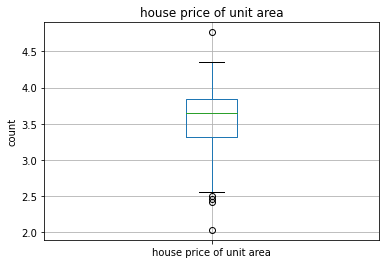

In [ ]:
features=['house age','distance to the nearest MRT station','latitude','house price of unit area']
for feature in features:
  df.boxplot(feature)
  plt.title(feature)
  plt.ylabel('count')
  plt.show()

In [ ]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3=np.percentile(datacolumn,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5* IQR)
  upper_range=Q3 +(1.5*IQR)
  return lower_range,upper_range

In [ ]:
# Check percentage outliers in each feature
for feature in features:
        data=df.copy()
        lowerbound,upperbound = outlier_treatment(data[feature])
        print(f"Feature is {feature} and {np.round(data[(data[feature] < lowerbound) | (data[feature] > upperbound)].shape[0]/ data.shape[0]*100,4)}% outliers")
        print("------------------------------")

Feature is house age and 0.0% outliers
------------------------------
Feature is distance to the nearest MRT station and 0.4831% outliers
------------------------------
Feature is latitude and 1.9324% outliers
------------------------------
Feature is house price of unit area and 1.2077% outliers
------------------------------


In [ ]:
#treating the outliers
for feature in features:
  lowerbound,upperbound=outlier_treatment(df[feature])
  df.drop(df[(df[feature]>upperbound)|(df[feature]< lowerbound)].index,inplace=True)
  print(f"Feature is {feature} and {np.round(df[(df[feature] < lowerbound) | (df[feature] > upperbound)].shape[0]/ df.shape[0]*100,4)}% outliers")
  print("---------------------------------")

Feature is house age and 0.0% outliers
---------------------------------
Feature is distance to the nearest MRT station and 0.0% outliers
---------------------------------
Feature is latitude and 0.0% outliers
---------------------------------
Feature is house price of unit area and 0.0% outliers
---------------------------------


In [ ]:
static=pd.get_dummies(df['transaction date'],prefix_sep='_',prefix='year')
static

,year_2012,year_2013
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
...,...,...
410,0,1
411,1,0
412,0,1
413,0,1


In [ ]:
df= pd.concat([df,static],axis=1)

In [ ]:
df.drop('transaction date', axis=1, inplace=True)

In [ ]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year_2012,year_2013
1,32.0,4.441225,10,3.218195,4.800245,3.634951,1,0
2,19.5,5.725527,9,3.218089,4.800239,3.742420,1,0
3,13.3,6.331474,5,3.218374,4.800276,3.856510,0,1
4,13.3,6.331474,5,3.218374,4.800276,4.003690,0,1
5,5.0,5.967603,5,3.218050,4.800264,3.763523,1,0


In [ ]:
df.shape

(399, 8)

## Data Prep

In [ ]:
# split the data into independent and dependent variables
x=df.drop('house price of unit area',axis=1)
y=df['house price of unit area']

In [ ]:
y

1      3.634951
2      3.742420
3      3.856510
4      4.003690
5      3.763523
         ...   
410    2.734368
411    3.912023
412    3.703768
413    3.960813
414    4.157319
Name: house price of unit area, Length: 399, dtype: float64

In [ ]:
#Scaling the data
scaler=MinMaxScaler()

In [ ]:
col=x.columns
x=pd.DataFrame(scaler.fit_transform(x),columns=col)
x.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,year_2012,year_2013
0,0.730594,0.110652,1.0,0.734144,0.714378,1.0,0.0
1,0.445205,0.375781,0.9,0.687400,0.706367,1.0,0.0
2,0.303653,0.500872,0.5,0.813458,0.754652,0.0,1.0
3,0.303653,0.500872,0.5,0.813458,0.754652,0.0,1.0
4,0.114155,0.425755,0.5,0.670223,0.738630,1.0,0.0


In [ ]:
x.shape

(399, 7)

In [ ]:
y= y.reset_index()

In [ ]:
y= y.drop('index',axis=1)

In [ ]:
x_df=x.copy()
y_df=y.copy()
df_1=pd.concat([x_df,y_df],axis=1)
df_1.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,year_2012,year_2013,house price of unit area
0,0.730594,0.110652,1.0,0.734144,0.714378,1.0,0.0,3.634951
1,0.445205,0.375781,0.9,0.687400,0.706367,1.0,0.0,3.742420
2,0.303653,0.500872,0.5,0.813458,0.754652,0.0,1.0,3.856510
3,0.303653,0.500872,0.5,0.813458,0.754652,0.0,1.0,4.003690
4,0.114155,0.425755,0.5,0.670223,0.738630,1.0,0.0,3.763523


## Feature Selection

In [ ]:
#splitting data for train and test
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3)

In [ ]:
print("shape of X_train:",x_train.shape)
print("shape of X_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (279, 7)
shape of X_test: (120, 7)
shape of y_train: (279, 1)
shape of y_test: (120, 1)


In [ ]:
# Adding a constant column to our X_train dataframe
x_train=sm.add_constant(x_train)

# create a first fitted model
model=sm.OLS(y_train.values.reshape(-1,1),x_train)
lm1=model.fit()

In [ ]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           7.51e-86
Time:                        09:32:43   Log-Likelihood:                 104.43
No. Observations:                 279   AIC:                            -194.9
Df Residuals:                     272   BIC:                            -169.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
#vif scores
def vif_score(x):
  vif_data=pd.DataFrame()
  vif_data['Variables']=x.columns
  vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
  return vif_data


print (vif_score(x))

                             Variables        VIF
0                            house age   1.025241
1  distance to the nearest MRT station   2.568569
2         number of convenience stores   1.939739
3                             latitude   1.372387
4                            longitude   1.688346
5                            year_2012  23.918217
6                            year_2013  55.420599


In [ ]:
x.drop(columns=['year_2012','year_2013'],axis=1,inplace=True)
print(vif_score(x))

                             Variables        VIF
0                            house age   3.457511
1  distance to the nearest MRT station   4.461219
2         number of convenience stores   5.065155
3                             latitude   9.043650
4                            longitude  12.411005


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)

# create a fitted model
model=sm.OLS(y_train.values.reshape(-1,1),X_train)
lm_2 = model.fit()

In [ ]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.13e-86
Time:                        09:32:43   Log-Likelihood:                 92.444
No. Observations:                 279   AIC:                            -172.9
Df Residuals:                     273   BIC:                            -151.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
x.drop(columns=['longitude'],axis=1,inplace=True)
print(vif_score(x))

                             Variables       VIF
0                            house age  3.437572
1  distance to the nearest MRT station  3.402271
2         number of convenience stores  4.138169
3                             latitude  6.640645


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)

# create a fitted model
model=sm.OLS(y_train.values.reshape(-1,1),X_train)
lm_3 = model.fit()

In [ ]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           3.57e-81
Time:                        09:32:43   Log-Likelihood:                 92.139
No. Observations:                 279   AIC:                            -174.3
Df Residuals:                     274   BIC:                            -156.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# Adding a constant column to our dataframe
X_test =  sm.add_constant(X_test)

# create a fitted model
lm_3 = sm.OLS(y_test.values.reshape(-1,1),X_test).fit()

In [ ]:
#print model 2 summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           4.80e-41
Time:                        09:32:43   Log-Likelihood:                 38.666
No. Observations:                 120   AIC:                            -67.33
Df Residuals:                     115   BIC:                            -53.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# Making predictions
y_pred = lm_3.predict(X_test)

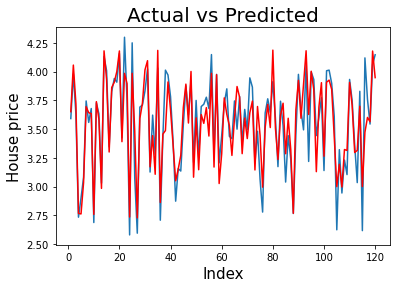

In [ ]:
# Actual vs Predicted graph as below
c = [i for i in range(1,121,1)]
fig = plt.figure()
#Plotting Actual
plt.plot(c,y_test)
#Plotting predicted
plt.plot(c,y_pred,color='red')
# Plot heading 
plt.title('Actual vs Predicted',fontsize=20)
# X-label
plt.xlabel('Index',fontsize=15)
# Y-label
plt.ylabel('House price',fontsize=15)
#showing the plot
plt.show()

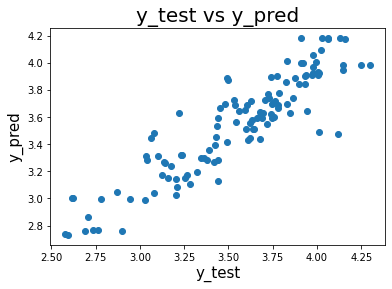

In [ ]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
#plotting scatter plot between actual and predicted
plt.scatter(y_test,y_pred)
# Plot heading 
plt.title('y_test vs y_pred',fontsize=20)
# X-label
plt.xlabel('y_test',fontsize=15)
# Y-label
plt.ylabel('y_pred',fontsize=15)
#show plot
plt.show()

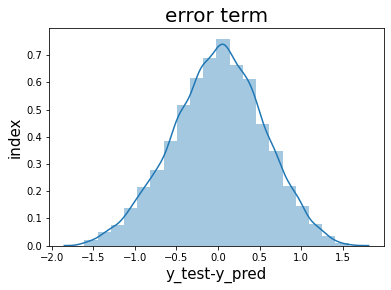

In [ ]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
#plot distplot of error tem
sns.distplot(y_test.values-y_pred.values,bins=20)
# Plot heading 
plt.title('error term',fontsize=20)
# X-label
plt.xlabel('y_test-y_pred',fontsize=15)

# Y-label"
plt.ylabel('index',fontsize=15)

#show plot
plt.show()

In [ ]:
#calculate and print RMSE
mse=mean_squared_error(y_test,y_pred)
print("Root Mean Squared error(RMSE) is: ",np.sqrt(mse))

Root Mean Squared error(RMSE) is:  0.17531794064642037


In [ ]:
#calculate and print MSE
print("Mean squared Error(MSE) is: ",mse)

Mean squared Error(MSE) is:  0.03073638031250178


In [ ]:
#calculate and print MAE
print("Mean Absolute error(MAE) is: ",mean_absolute_error(y_test,y_pred))

Mean Absolute error(MAE) is:  0.1341267664468945


In [ ]:
print(vif_score(x))

                             Variables       VIF
0                            house age  3.437572
1  distance to the nearest MRT station  3.402271
2         number of convenience stores  4.138169
3                             latitude  6.640645


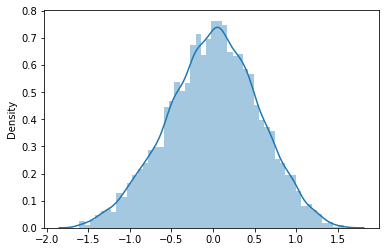

In [ ]:
residual=y_test.values-y_pred.values
sns.distplot(residual)

In [ ]:
np.mean(residual)

8.842309600570135e-16

In [ ]:
#fitting in  linear Modrl
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


In [ ]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [ ]:
r2_train,r2_test


(0.7499192256766952, 0.7894556301457878)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.18650792091581814